In [16]:
import re
import glob
import json
import random
from rdkit import Chem
from tqdm import tqdm
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
paths = glob.glob("*_converted_selfies.jsonl")
paths

['OPT_1.2B_ep_1_aspirin_0.4_sf_1000K_gen_1000000_converted_selfies.jsonl',
 'OPT_1.2B_ep_1_druglike_0.4_sf_1000K_gen_1000000_converted_selfies.jsonl',
 'OPT_1.2B_ep_1_equal_dist_sf_1000K_gen_1000000__converted_selfies.jsonl',
 'OPT_1.2B_ep_1_sas_3_sf_1000K_gen_1000000_converted_selfies.jsonl']

In [18]:
selfies_data = {}

for path in paths:
    subset_name = path.split("ep_1_")[1].split("_sf")[0]
    selfies_data[subset_name] = []

    with open(path, "r") as file_1:
        for line_str in tqdm(file_1):
            line_obj = json.loads(line_str)
            selfies_data[subset_name].append(line_obj["text"])

1000192it [00:01, 518106.17it/s]
1000192it [00:01, 528074.03it/s]
1000192it [00:01, 529150.15it/s]
1000192it [00:01, 520175.50it/s]


In [19]:
selfies_data["aspirin_0.4"][:3]

['[C][C][O][C][O][C][Ring1][Branch1][C][=C][C][Ring1][=Branch1][Branch1][C][O][C][Ring1][#Branch2][C][=O]',
 '[C][=C][C][=C][C][Branch1][Ring1][O][C][=C][C][Branch1][Ring1][C][=C][C][Ring1][=Branch2][O]',
 '[C][C][Branch1][C][O][C][C][=C][Branch1][Ring1][C][=O][C][C][Ring1][#Branch1][=O]']

In [20]:
tokens = re.findall(r'\[.*?\]', selfies_data["aspirin_0.4"][0])
tokens

['[C]',
 '[C]',
 '[O]',
 '[C]',
 '[O]',
 '[C]',
 '[Ring1]',
 '[Branch1]',
 '[C]',
 '[=C]',
 '[C]',
 '[Ring1]',
 '[=Branch1]',
 '[Branch1]',
 '[C]',
 '[O]',
 '[C]',
 '[Ring1]',
 '[#Branch2]',
 '[C]',
 '[=O]']

In [21]:
# making unique counts
for k in selfies_data:
    selfies_data[k] = list(set(selfies_data[k]))[:939618]

In [26]:
df = pd.DataFrame(selfies_data)
# df = df[:1_000_000]
df.head()

,aspirin_0.4,druglike_0.4,equal_dist,sas_3
0,[C][C][=C][C][C][Branch1][C][O][C][=Branch1][C...,[C][C][C][=C][Branch1][Ring1][C][O][C][C][C][=...,[N][N][=C][C][O][C][=C][C][Ring1][Branch1][N][...,[C][C][C][=C][C][C][C][C][Branch1][C][N][C][C]...
1,[C][C][Branch1][C][O][C][C][Ring1][Ring2][Bran...,[C][C][=C][O][C][C][=Branch1][C][=N][N][C][=Br...,[O][=C][O][C][Branch1][#Branch1][C][C][C][Ring...,[C][C][=N][N][=C][Branch1][C][N][C][Branch1][#...
2,[C][C][=C][C][=Branch1][C][=O][C][Branch1][C][...,[C][C][=Branch1][C][=O][N][C][C][Branch1][C][C...,[O][=S][=Branch1][C][=O][N][C][=C][C][=C][C][C...,[C][C][C][=N][C][=C][C][Branch1][C][C][=C][O][...
3,[C][=C][Branch1][Ring1][C][C][O][C][=C][O][C][...,[C][O][C][C][C][=Branch1][C][=O][C][Branch1][=...,[C][=N][N][C][C][=C][Branch1][=Branch1][C][Bra...,[C][C][C][C][=N][N][C][=Branch1][C][=O][C][=C]...
4,[C][C][C][=C][Branch1][#Branch1][C][Branch1][C...,[C][C][C][C][C][=C][NH1][C][Branch1][C][O][=C]...,[O][C][C][C][Branch1][C][O][C][C][N][Ring1][Ri...,[C][=C][C][=Branch1][C][=C][C][C][O][C][C][=Br...


In [27]:
len(df)

939618

In [28]:
for k in selfies_data:
    df[f"{k}_lengths"] = df[k].apply(lambda x: x.count("["))

In [29]:
df[:10]

,aspirin_0.4,druglike_0.4,equal_dist,sas_3,aspirin_0.4_lengths,druglike_0.4_lengths,equal_dist_lengths,sas_3_lengths
0,[C][C][=C][C][C][Branch1][C][O][C][=Branch1][C...,[C][C][C][=C][Branch1][Ring1][C][O][C][C][C][=...,[N][N][=C][C][O][C][=C][C][Ring1][Branch1][N][...,[C][C][C][=C][C][C][C][C][Branch1][C][N][C][C]...,25,21,19,15
1,[C][C][Branch1][C][O][C][C][Ring1][Ring2][Bran...,[C][C][=C][O][C][C][=Branch1][C][=N][N][C][=Br...,[O][=C][O][C][Branch1][#Branch1][C][C][C][Ring...,[C][C][=N][N][=C][Branch1][C][N][C][Branch1][#...,23,19,21,23
2,[C][C][=C][C][=Branch1][C][=O][C][Branch1][C][...,[C][C][=Branch1][C][=O][N][C][C][Branch1][C][C...,[O][=S][=Branch1][C][=O][N][C][=C][C][=C][C][C...,[C][C][C][=N][C][=C][C][Branch1][C][C][=C][O][...,23,21,21,19
3,[C][=C][Branch1][Ring1][C][C][O][C][=C][O][C][...,[C][O][C][C][C][=Branch1][C][=O][C][Branch1][=...,[C][=N][N][C][C][=C][Branch1][=Branch1][C][Bra...,[C][C][C][C][=N][N][C][=Branch1][C][=O][C][=C]...,18,21,18,17
4,[C][C][C][=C][Branch1][#Branch1][C][Branch1][C...,[C][C][C][C][C][=C][NH1][C][Branch1][C][O][=C]...,[O][C][C][C][Branch1][C][O][C][C][N][Ring1][Ri...,[C][=C][C][=Branch1][C][=C][C][C][O][C][C][=Br...,23,19,25,16
5,[C][O][C][C][C][=Branch1][C][=O][C][Branch1][R...,[C][C][C][C][Branch1][Ring1][C][=O][N][C][=C][...,[C][C][C][Branch1][Ring1][C][O][N][Ring1][Bran...,[C][C][=C][C][Branch1][#Branch1][N][C][Branch1...,21,21,19,23
6,[C][=C][Branch1][Branch2][O][C][=C][O][C][C][=...,[C][N][C][=C][Branch1][C][O][NH1][C][=Branch1]...,[C][N][C][C][C][Ring1][Ring1][C][Branch1][C][N...,[O][=C][C][C][Branch1][O][C][C][=C][C][=C][C][...,17,20,25,19
7,[C][=C][C][C][=Branch1][C][=C][O][C][Branch1][...,[C][#C][C][=Branch1][C][=O][C][=Branch1][C][=O...,[C][O][C][C][O][C][C][C][C][Branch1][Ring1][C]...,[C][O][C][=C][C][=C][C][Branch1][#Branch1][O][...,23,19,21,19
8,[C][=C][C][C][C][Branch1][Branch1][C][Ring1][R...,[C][N][C][=C][NH1][C][=C][N][=C][Ring1][=Branc...,[C][#C][C][Branch1][C][O][C][N][C][C][C][N][C]...,[C][C][NH1][C][=C][Branch1][Ring1][C][N][C][Br...,25,17,21,21
9,[C][=C][C][O][C][Branch1][Branch2][C][=Branch1...,[C][C][=C][Branch1][Branch2][O][C][C][Branch1]...,[C][=C][O][C][C][C][Ring1][Branch1][C][Branch1...,[C][C][=N][C][Branch1][#Branch2][C][C][N][Bran...,21,21,21,21


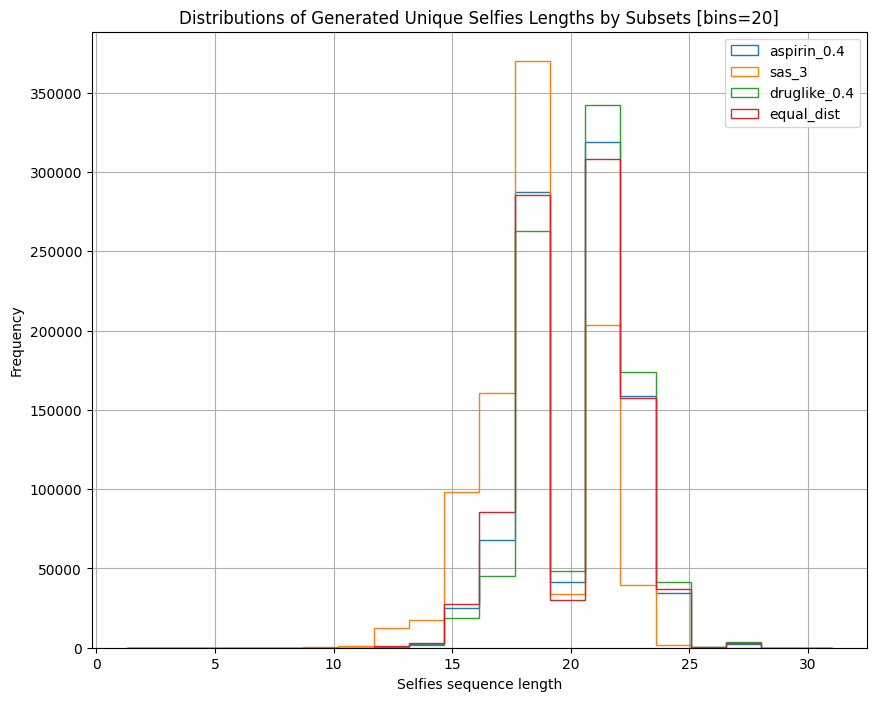

In [33]:
plt.figure(figsize=(10,8))
bins=20

ploted_df = df[["aspirin_0.4_lengths", "sas_3_lengths", "druglike_0.4_lengths", "equal_dist_lengths"]]

for k in ploted_df.columns:    
    ploted_df[k].hist(bins=bins, alpha=1, range=(1.3, 31), histtype = 'step')


plt.xlabel("Selfies sequence length")
plt.ylabel("Frequency")
# plt.yscale("log")
plt.title(f"Distributions of Generated Unique Selfies Lengths by Subsets [bins={bins}]");
plt.legend([x.split("_len")[0] for x in ploted_df.columns], loc='upper right');

In [2]:
def randomize_smiles(mol, random_type="restricted"):
    if not mol:
        return None

    if random_type == "unrestricted":
        return Chem.MolToSmiles(mol, canonical=False, doRandom=True, isomericSmiles=False)
    
    if random_type == "restricted":
        new_atom_order = list(range(mol.GetNumHeavyAtoms()))
        random.shuffle(new_atom_order)
        random_mol = Chem.RenumberAtoms(mol, newOrder=new_atom_order)
        return Chem.MolToSmiles(random_mol, canonical=False, isomericSmiles=False)
    
    raise ValueError("Type '{}' is not valid".format(random_type))

In [35]:
sm = "CCC1COC2CNC1C2(N)CC"

In [36]:
mol = Chem.MolFromSmiles(sm)
mol

In [37]:
mol.GetNumHeavyAtoms()

13

In [38]:
new_atom_order = list(range(mol.GetNumHeavyAtoms()))


In [39]:
new_atom_order

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [44]:
random.shuffle(new_atom_order)

In [45]:
new_atom_order

[4, 1, 10, 7, 3, 11, 0, 2, 9, 6, 5, 8, 12]

In [1]:
from itertools import permutations

In [ ]:
all_possibilities = list(permutations(range(12)))

: 

In [ ]:
len(all_possibilities)

3628800

In [1]:
import math


In [15]:
math.factorial(5)

120

In [9]:
sm="C=C1OCC(C(C)C=CC)C12CO2"

In [11]:
Chem.MolFromSmiles(sm).GetNumHeavyAtoms()

13

In [ ]:
random_mol = Chem.RenumberAtoms(mol, newOrder=new_atom_order)